In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Data is transformed into tensors for NN and normalized to make it standard
Batch size = 4 means predictions will be made on 4 images at once during the training
trainset = torchvision.datasets.CIFAR10(...): Loads the CIFAR-10 dataset for training.
root='./data': Specifies the directory where the dataset will be stored or loaded from.
train=True: Indicates that this is the training set.
download=True: Downloads the dataset if it's not already available locally.
transform=transform: Applies the specified transformations (defined earlier) to the input data.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 66466730.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


def imshow(img):: Defines a function named imshow that takes one argument (img), representing an image tensor.
img = img / 2 + 0.5: Performs an unnormalization operation on the input image tensor. This reverses the normalization applied during data preprocessing. It assumes that the input image values were normalized to be in the range [-1, 1], and this operation brings them back to the range [0, 1].
npimg = img.numpy(): Converts the PyTorch tensor (img) to a NumPy array (npimg). This conversion is necessary for visualization because matplotlib works with NumPy arrays.
plt.imshow(np.transpose(npimg, (1, 2, 0))): Displays the image using matplotlib.pyplot.imshow(). Before displaying, it transposes the dimensions of the NumPy array using np.transpose() to match the required format for displaying images in matplotlib (height, width, channels).
plt.show(): Shows the image plot.

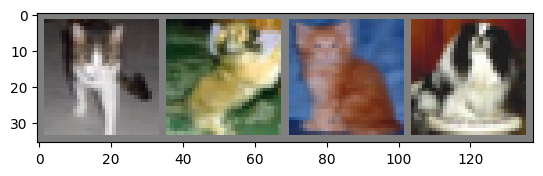

cat   dog   cat   dog  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Importing Optimizer Module:
import torch.optim as optim: Imports the optim module from the PyTorch library, which provides various optimization algorithms for updating the parameters of neural network models during training.
Defining the Loss Function:
criterion = nn.CrossEntropyLoss(): Creates an instance of the Cross Entropy Loss function from the torch.nn module.
nn.CrossEntropyLoss() is commonly used for classification tasks, especially when dealing with multiple classes. It combines the softmax function and the negative log-likelihood loss to compute the loss between the model's predictions and the true class labels.
Defining the Optimizer:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9): Creates an instance of the Stochastic Gradient Descent (SGD) optimizer from the optim module.
net.parameters(): Provides the parameters (weights and biases) of the neural network net to be optimized. These are the trainable parameters of the model.
lr=0.001: Specifies the learning rate, which controls the step size of parameter updates during optimization. A lower learning rate means smaller steps, which can help prevent overshooting the minimum of the loss function.
momentum=0.9: Introduces momentum to the optimization process. Momentum helps accelerate the optimization by adding a fraction of the previous parameter update to the current update. This can help overcome small gradients and speed up convergence.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.876
[1,  6000] loss: 1.680
[1,  8000] loss: 1.588
[1, 10000] loss: 1.534
[1, 12000] loss: 1.492
[2,  2000] loss: 1.400
[2,  4000] loss: 1.369
[2,  6000] loss: 1.344
[2,  8000] loss: 1.333
[2, 10000] loss: 1.289
[2, 12000] loss: 1.256
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

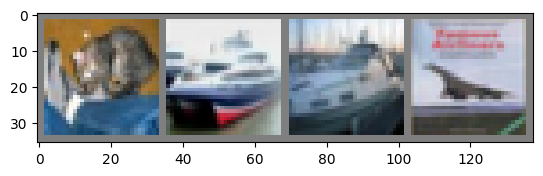

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 41.5 %
Accuracy for class: car   is 59.7 %
Accuracy for class: bird  is 56.0 %
Accuracy for class: cat   is 18.9 %
Accuracy for class: deer  is 41.1 %
Accuracy for class: dog   is 39.1 %
Accuracy for class: frog  is 71.0 %
Accuracy for class: horse is 70.1 %
Accuracy for class: ship  is 83.7 %
Accuracy for class: truck is 67.4 %
